# Questions taken from Stackoverflow

This page lists questions about automata and other rational/regular expressions that were asked on Stackoverflow, and where [Vcsn](http://vcsn.lrde.epita.fr) seems to be an appropriate tool to compute the answer.

In [1]:
import vcsn
# In this documentation, ensure reproducible random values.
vcsn.setenv(SEED=1)

## [Build a Regular Expression and Finite Automata](http://stackoverflow.com/questions/22366534)

> The set of all strings beginning with 101 and ending with 01010. 

First, let's define our "context": we work with letters on the alphabet $\{0, 1\}$.

In [2]:
import vcsn
c = vcsn.context('[01]')
c

[01]? -> B

Then, we build our expression using an unusual operator: $\mathsf{E} \& \mathsf{F}$ denotes the conjunction of expressions $\mathsf{E}$ and $\mathsf{F}$.  In this case (unweighted/Boolean automata), it denotes exactly the intersection of languages.

In [3]:
e = c.expression('(101[01]*)&([01]*01010)')
e

101(0+1)*&(0+1)*01010

We want to normalize this extended expression (it has conjunction and complement operators) into a basic expression.  To this end, we first convert it to an automaton.

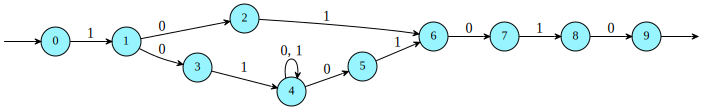

In [4]:
a = e.automaton()
a

and then we convert this automaton into a basic expression:

In [5]:
a.expression()

1(01+01(0+1)*01)010

Or, in ASCII:

In [6]:
print(a.expression())

1(01+01(0+1)*01)010


## [Regular expression to match text that *doesn't* contain a word?](http://stackoverflow.com/questions/406230)
 > I'd like to know if it's possible to match lines that don't contain a specific word (e.g. hede) using a regular expression?

First, let's define that alphabet we work on: from $a$ to $z$ for instance (the system reports that our automata compute a simple Boolean: the word is accepted or not).

In [7]:
import vcsn
c = vcsn.context('[a-z]')
c

[abcdefghijklmnopqrstuvwxyz]? -> B

Then we define our expression, which is extended (it uses the complement operator), so to normalize it, we first convert it into automaton (with [`expression.automaton`](expression.automaton.ipynb)), from which we extract a basic expression (with [`automaton.expresion`](automaton.expression.ipynb)).

In [8]:
e = c.expression('(hede){c}')
e

(hede){c}

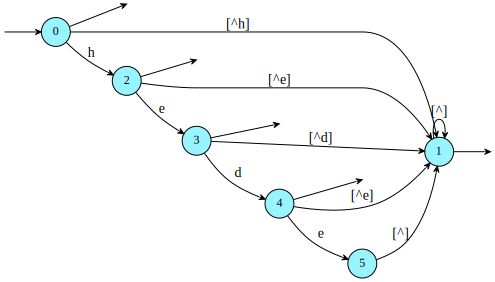

In [9]:
a = e.automaton()
a

In [10]:
a.expression()

\e+h(\e+e(\e+d))+([^h]+h([^e]+e([^d]+d([^e]+e[^]))))[^]*

Or, in ASCII (`+` is usually denoted `|`; `\e` denotes the empty word; and `[^]` denotes any character, usually written `.`):

In [11]:
print(a.expression())

\e+h(\e+e(\e+d))+([^h]+h([^e]+e([^d]+d([^e]+e[^]))))[^]*


## [Convert finite state machine to regular expression](http://stackoverflow.com/questions/36853077)
> Is there a tool (or an algorithm) to convert a finite state machine into a regular expression?

Vcsn is tool for rational expressions and automata.
See http://vcsn.lrde.epita.fr.

In [12]:
import vcsn

Build a random automaton $a$ of 4 states, labeled by letters to choose in ${a, b, c}$, no more than 2 per transition.

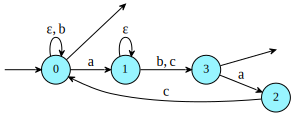

In [13]:
a = vcsn.context('[abc]').random_automaton(4, max_labels=2, num_final=2)
a

Then "lift" it into an automaton $b$ labeled by expressions.

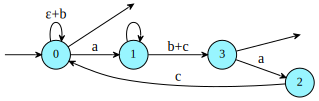

In [14]:
b = a.lift()
b

Eliminate state 2, then 3, etc.  The order does not matter for correction (any order gives _a_ correct result), but the quality of the result does depend on this order.

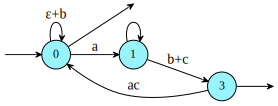

In [15]:
b = b.eliminate_state(2)
b

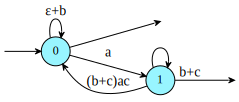

In [16]:
b = b.eliminate_state(3); b

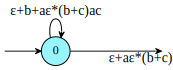

In [17]:
b = b.eliminate_state(1); b

Eliminate the last state, and read the answer.

In [18]:
b = b.eliminate_state(0); b

Alternatively, you can use the method [`automaton.expression`](automaton.expression.ipynb) to ask for the result.

In [19]:
a.expression()

(\e+b+a\e*(b+c)ac)*(\e+a\e*(b+c))

You may see this algorithm run "interactively" using `%demo`.

In [20]:
a = vcsn.context('[abc]').random_automaton(10)
b = a.lift()
%demo b eliminate_state

HBox(children=(Label(value='Algorithm step(s):'), IntSlider(value=0, max=10)))

HTML(value='<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.40.1 (20161225.0304)\n -->\n<!-- Title: %3 Pages: 1 -->\n<svg width="740pt" height="204pt"\n viewBox="0.00 0.00 740.00 203.50" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 199.5)">\n<title>%3</title>\n<polygon fill="#ffffff" stroke="transparent" points="-4,4 -4,-199.5 736,-199.5 736,4 -4,4"/>\n<!-- I0 -->\n<g id="node1" class="node">\n<title>I0</title>\n<ellipse fill="#000000" stroke="#000000" cx="0" cy="-59" rx="0" ry="0"/>\n</g>\n<!-- 0 -->\n<g id="node3" class="node">\n<title>0</title>\n<ellipse fill="#98f5ff" stroke="#000000" cx="51.5" cy="-59" rx="14.5" ry="14.5"/>\n<text text-anchor="middle" x="51.5" y="-55.9" font-family="Times,serif" font-size="12.00" fill="#000000">0</text>\n</g>\n<!-- I0&#45;&gt;0 -->\n<g id="edge1" class="edge">\n<title>I0&#45;&gt;0</title>\n<path fill="none" stroke="#000000" d="M.1477,-59C1.8156,-59 17.298,-59 30.83,-59"/>\n<polygon fill="#000000" stroke="#000000" points="36.854,-59 30.854,-61.7001 33.854,-59 30.854,-59.0001 30.854,-59.0001 30.854,-59.0001 33.854,-59 30.854,-56.3001 36.854,-59 36.854,-59"/>\n</g>\n<!-- F2 -->\n<g id="node2" class="node">\n<title>F2</title>\n<ellipse fill="#000000" stroke="#000000" cx="251.5" cy="-114" rx="0" ry="0"/>\n</g>\n<!-- 0&#45;&gt;0 -->\n<g id="edge2" class="edge">\n<title>0&#45;&gt;0</title>\n<path fill="none" stroke="#000000" d="M46.086,-72.692C44.445,-82.169 46.25,-91.5 51.5,-91.5 55.602,-91.5 57.6,-85.805 57.496,-78.794"/>\n<polygon fill="#000000" stroke="#000000" points="56.914,-72.692 60.1716,-78.4085 57.1989,-75.6784 57.4838,-78.6649 57.4838,-78.6649 57.4838,-78.6649 57.1989,-75.6784 54.796,-78.9213 56.914,-72.692 56.914,-72.692"/>\n<text text-anchor="middle" x="51.5" y="-95.3" font-family="Times,serif" font-size="14.00" fill="#000000">⟨ε+c⟩</text>\n</g>\n<!-- 2 -->\n<g id="node5" class="node">\n<title>2</title>\n<ellipse fill="#98f5ff" stroke="#000000" cx="151.5" cy="-59" rx="14.5" ry="14.5"/>\n<text text-anchor="middle" x="151.5" y="-55.9" font-family="Times,serif" font-size="12.00" fill="#000000">2</text>\n</g>\n<!-- 0&#45;&gt;2 -->\n<g id="edge3" class="edge">\n<title>0&#45;&gt;2</title>\n<path fill="none" stroke="#000000" d="M66.255,-59C83.242,-59 111.27,-59 130.52,-59"/>\n<polygon fill="#000000" stroke="#000000" points="136.68,-59 130.68,-61.7001 133.68,-59 130.68,-59.0001 130.68,-59.0001 130.68,-59.0001 133.68,-59 130.68,-56.3001 136.68,-59 136.68,-59"/>\n<text text-anchor="middle" x="101.5" y="-62.8" font-family="Times,serif" font-size="14.00" fill="#000000">⟨ε+a+b⟩</text>\n</g>\n<!-- 1 -->\n<g id="node4" class="node">\n<title>1</title>\n<ellipse fill="#d3d3d3" stroke="#000000" cx="529.5" cy="-167" rx="14.5" ry="14.5"/>\n<text text-anchor="middle" x="529.5" y="-163.9" font-family="Times,serif" font-size="12.00" fill="#000000">1</text>\n</g>\n<!-- 9 -->\n<g id="node12" class="node">\n<title>9</title>\n<ellipse fill="#d3d3d3" stroke="#000000" cx="629.5" cy="-181" rx="14.5" ry="14.5"/>\n<text text-anchor="middle" x="629.5" y="-177.9" font-family="Times,serif" font-size="12.00" fill="#000000">9</text>\n</g>\n<!-- 1&#45;&gt;9 -->\n<g id="edge4" class="edge">\n<title>1&#45;&gt;9</title>\n<path fill="none" stroke="#696969" d="M542.02,-174.32C547.88,-177.34 555.08,-180.48 562,-182 577.44,-185.39 595.36,-184.93 608.85,-183.74"/>\n<polygon fill="#696969" stroke="#696969" points="615.09,-183.1 609.3968,-186.3982 612.1057,-183.4061 609.1213,-183.7123 609.1213,-183.7123 609.1213,-183.7123 612.1057,-183.4061 608.8458,-181.0263 615.09,-183.1 615.09,-183.1"/>\n</g>\n<!-- 2&#45;&gt;F2 -->\n<g id="edge5" class="edge">\n<title>2&#45;&gt;F2</title>\n<path fill="none" stroke="#000000" d="M164.5733,-66.1903C186.6698,-78.3434 230.506,-102.4533 245.9544,-11

## [Constructing a Regular Expression from a Finite Automata](http://stackoverflow.com/questions/4491245)
> I'm trying to construct a regular expression from a Finite Automaton but found my self completely stuck with this one.

In [21]:
import vcsn

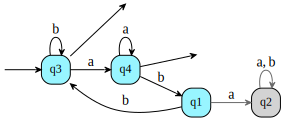

In [22]:
%%automaton a
$  -> q3
q1 -> q2 a
q1 -> q3 b
q2 -> q2 a, b
q3 -> q4 a
q3 -> q3 b
q4 -> q4 a
q4 -> q1 b
q3 -> $
q4 -> $

In [23]:
a.expression()

(b+aa*bb)*(\e+aa*)

## [How to find the right quotient of a language given two languages?](http://math.stackexchange.com/questions/1276579)

(This is the question with typos in $L_1$ and $L_2$ fixed.)
> If $L_1= \{a^n b^m  \mid n \geqslant 1, m  \geqslant 0 \} \cup \{ba\}$ and
$L_2= \{b^m \mid m  \geqslant 1 \}$.
> I am not getting how the DFA for $L_1/L_2$ is constructed in the second figure using the DFA for $L_1$, please tell me the approach.

First, let's define our "context": we work with labels are letters on the alphabet $\{a, b\}$.  (We don't use weights, or rather, we use the traditional Boolean weights: $\mathbb{B}$.)

In [24]:
import vcsn
c = vcsn.context('[ab]')
c

[ab]? -> B

Then define the first automaton, Figure 4.1.

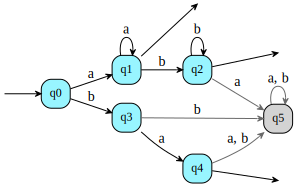

In [25]:
%%automaton a1
$  -> q0
q1 -> $
q0 -> q1 a
q0 -> q3 b
q1 -> q1 a
q1 -> q2 b
q2 -> $
q2 -> q2 b
q2 -> q5 a
q3 -> q4 a
q3 -> q5 b
q4 -> $
q4 -> q5 a, b
q5 -> q5 a, b

In [26]:
a1.is_deterministic() and a1.is_complete()

True

Automaton $\mathcal{A}_2$ represents the language $L_2$:

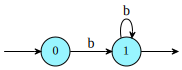

In [27]:
a2 = c.expression('b{+}').automaton()
a2

We may now compute the quotient, which is indeed the automaton of Figure 4.2.  It is better looking once trimmed.

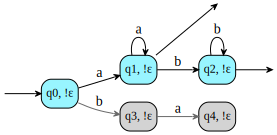

In [28]:
a1 / a2

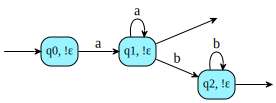

In [29]:
(a1 / a2).trim()